# Visualizing spatial data with Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## GeoPandas visualization functionality

#### Basic plot

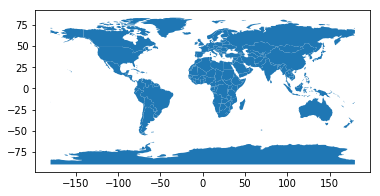

In [3]:
countries.plot()

#### Adjusting the figure size

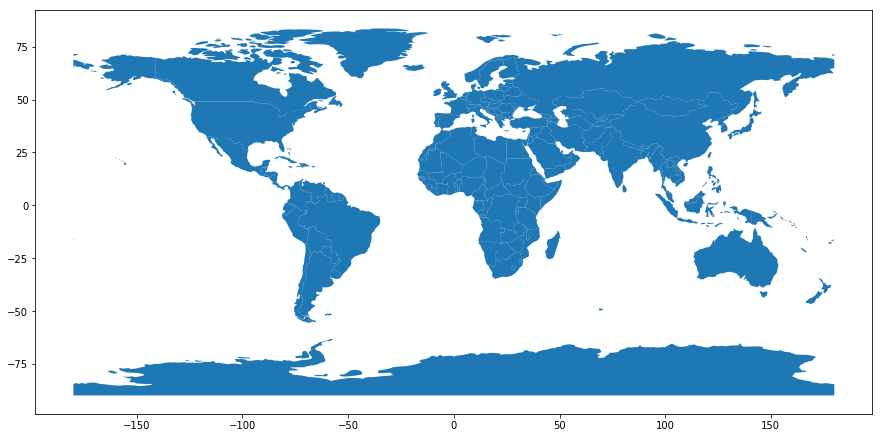

In [4]:
countries.plot(figsize=(15, 15))

#### Removing the box / x and y coordinate labels

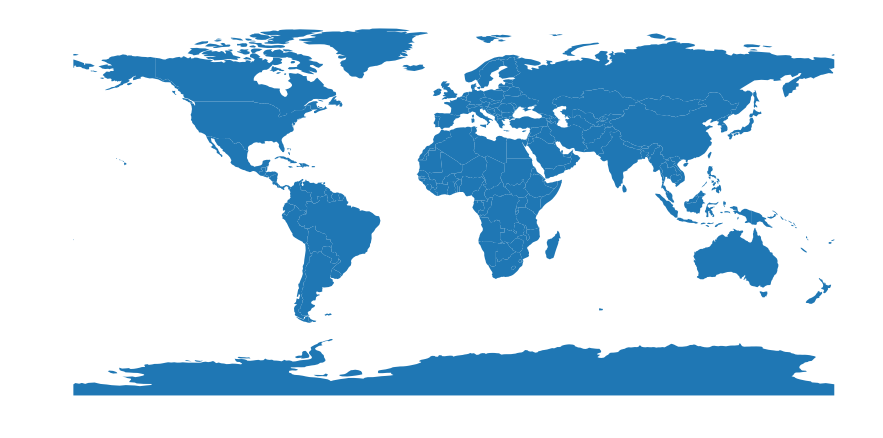

In [5]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

#### Coloring based on column values

Let's first create a new column with the GDP per capita:

In [6]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]

In [7]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

and now we can use this column to color the polygons:

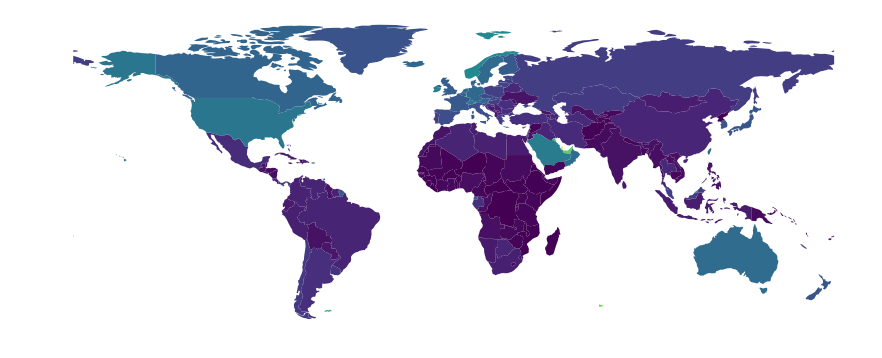

In [8]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

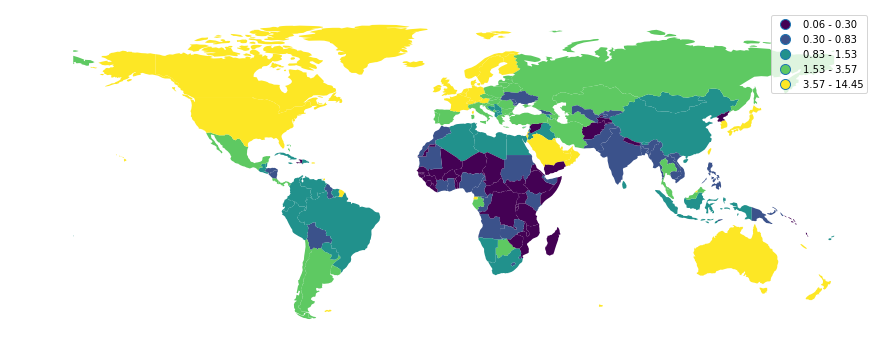

In [9]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

#### Combining different dataframes on a single plot

The `.plot` method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the `ax=` keyword:

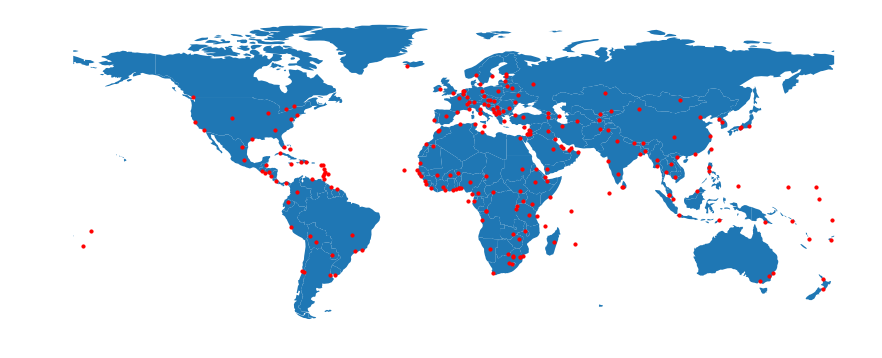

In [10]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(-40, 40), (-20, 60)]

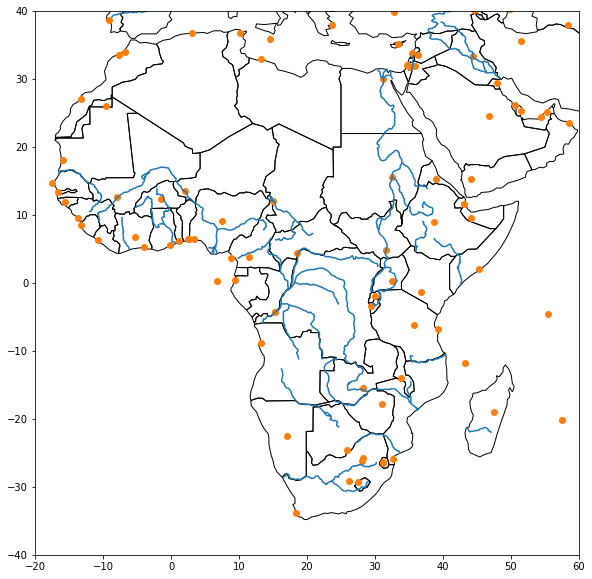

In [11]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Using `geoplot`

The `geoplot` packages provides some additional functionality compared to the basic `.plot()` method on GeoDataFrames:

- High-level plotting API (with more plot types as geopandas)
- Native projection support

https://residentmario.github.io/geoplot/index.html

In [12]:
import geoplot
import geoplot.crs as gcrs

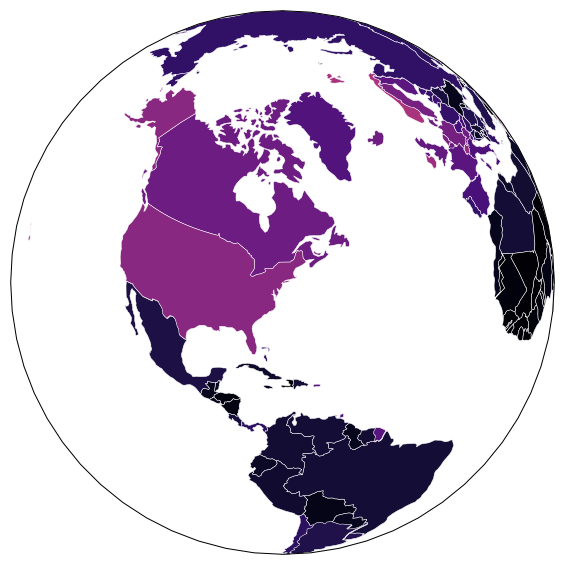

In [13]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=40.7128, central_longitude=-74.0059)
})
geoplot.choropleth(countries, hue='gdp_per_cap', projection=gcrs.Orthographic(), ax=ax,
                   cmap='magma', linewidth=0.5, edgecolor='white', k=None)
ax.set_global()
ax.outline_patch.set_visible(True)
#ax.coastlines()

## Using `cartopy`

Cartopy is the base matplotlib cartographic library, and it is used by `geoplot` under the hood to provide projection-awareness.

http://scitools.org.uk/cartopy/docs/latest/index.html

The following example is taken from the docs: http://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html#sphx-glr-gallery-cartopy-convert-py

In [14]:
from cartopy import crs as ccrs

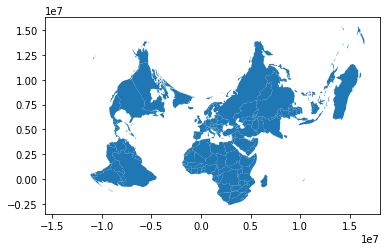

In [15]:
# Define the CartoPy CRS object.
crs = ccrs.AlbersEqualArea()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
countries_ae = countries.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
countries_ae.plot()

## Interactive web-based visualizations

There are nowadays many libraries that target interactive web-based visualizations and that can handle geospatial data. Some packages with an example for each:

- Bokeh: https://bokeh.pydata.org/en/latest/docs/gallery/texas.html
- GeoViews (other interface to Bokeh/matplotlib): http://geo.holoviews.org
- Altair: https://altair-viz.github.io/gallery/choropleth.html
- Plotly: https://plot.ly/python/#maps
- ...

Another popular javascript library for online maps is [Leaflet.js](https://leafletjs.com/), and this has python bindings in the [folium](https://github.com/python-visualization/folium) and [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) packages.

An example with folium:

In [16]:
import folium

In [17]:
m = folium.Map([48.8566, 2.3429], zoom_start=6, tiles="OpenStreetMap")
folium.GeoJson(countries.to_json()).add_to(m)
m

In [18]:
m = folium.Map([48.8566, 2.3429], zoom_start=6, tiles="OpenStreetMap")
folium.GeoJson(cities.to_json()).add_to(m)
m